In [237]:

# import packages 
#import tensorflow as tf
import pandas as pd  
import numpy as np 
import gzip
import nltk
# from keras.models import Sequential
# from keras.layers import LSTM, GRU, Dense, Activation, Dropout, Input, Embedding, Bidirectional, Reshape, Flatten, Conv1D, MaxPooling1D, MaxPool1D, GlobalMaxPool1D, SpatialDropout1D
# from keras.preprocessing import text, sequence
# from keras import utils
# from keras import callbacks
# from keras import optimizers, models
# import keras_metrics
# from keras.utils import to_categorical


from sklearn import model_selection, preprocessing, metrics
import matplotlib.pyplot as plt
import zipfile

import io
import requests

import nltk
import re

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# %load_ext memory_profiler

In [270]:
url="https://raw.githubusercontent.com/juliabuffinton/w210-capstone-qg/master/data/MCTest/mc160.train.tsv"
content=requests.get(url).content
train_raw_160=pd.DataFrame()
train_raw_160=pd.read_csv(io.StringIO(content.decode('utf-8')), header=None, sep='\t')


In [269]:
train_raw_160.count()

0     70
1     70
2     70
3     70
4     70
5     70
6     70
7     70
8     70
9     70
10    70
11    70
12    70
13    70
14    70
15    70
16    70
17    70
18    70
19    70
20    70
21    70
22    70
dtype: int64

In [247]:
url="https://raw.githubusercontent.com/juliabuffinton/w210-capstone-qg/master/data/MCTest/mc500.train.tsv"
content=requests.get(url).content
train_raw_500=pd.DataFrame()
train_raw_500 = pd.read_csv(io.StringIO(content.decode('utf-8')), header=None, sep='\t')


In [267]:
len(train_raw_500)

300

In [248]:
test_raw=pd.DataFrame()
test_raw = pd.concat([train_raw_160,train_raw_500])

In [249]:
cols_raw=['id', 'description', 'story',
           'q1', 'a11', 'a12', 'a13', 'a14',
           'q2', 'a21', 'a22', 'a23', 'a24',
           'q3', 'a31', 'a32', 'a33', 'a34',
           'q4', 'a41', 'a42', 'a43', 'a44']

In [250]:
test_raw.columns=cols_raw

In [251]:
test_raw.head(1)

,id,description,story,q1,a11,a12,a13,a14,q2,a21,a22,a23,a24,q3,a31,a32,a33,a34,q4,a41,a42,a43,a44
0,mc160.train.0,Author: 1844466225;Work Time(s): 2383,Tom had to fix some things around the house. He had to fix the door. He had to fix the\newlinewindow. But before he did anything he had to fix the toilet. Tom called over his best\newlinefriend Jim to help him. Jim brought with him his friends Molly and Holly. Tom thought that\newlineJim was going to bring Dolly with him but he didn't. The four of them got to work right\newlineaway. Fixing the toilet was easy. Fixing the door was also easy but fixing the window was\newlinevery hard. The window was stuck and could not be opened. They all pushed on the window\newlinereally hard until finally it opened. Once the window was fixed the four of them made a\newlinedelicious dinner and talked about all of the good work that they had done. Tom was glad\newlinethat he had such good friends to help him with his work.,multiple: What was the hardest thing for Tom and his friends to fix?,Door,House,Window,Toilet,one: What did Tom need to fix first?,Door,House,Window,Toilet,multiple: Jim didn't bring which person with him?,Jim,Dolly,Molly,Holly,one: Who was Tom's best friend?,Molly,Holly,Jim,Dolly


In [266]:
len(test_raw)

370

In [253]:
#Checking multiple and single choice questions
for col in ['q1','q2','q3','q4']:
    print('{} count hard(multiple lookup) {} , count easy(single sentence) {}'.format(col,test_raw[test_raw[col].str.contains('multiple:')]['id'].count() ,
            test_raw[test_raw[col].str.contains('multiple:') == False]['id'].count()))


q1 count hard(multiple lookup) 204 , count easy(single sentence) 166
q2 count hard(multiple lookup) 191 , count easy(single sentence) 179
q3 count hard(multiple lookup) 208 , count easy(single sentence) 162
q4 count hard(multiple lookup) 198 , count easy(single sentence) 172


In [254]:
for col in ['q1','q2','q3','q4']:
    print("{} documents with null {}".format(test_raw[col].isnull().sum(), col))



0 documents with null q1
0 documents with null q2
0 documents with null q3
0 documents with null q4


In [255]:
pd.options.display.max_columns = 100000
pd.options.display.max_rows = 100000
pd.options.display.max_colwidth = 100000
pd.options.display.width = None


In [256]:
test_raw['story_tmp'] = test_raw['story'].str.replace('\\\\newline','\n')

In [257]:
test_raw['count_words'] = test_raw['story_tmp'].apply(lambda x : len(nltk.tokenize.word_tokenize(x)))


In [258]:
test_raw['count_sentences'] = test_raw['story_tmp'].apply(lambda x : len(nltk.tokenize.sent_tokenize(x)))

In [259]:
test_raw['count_passages'] = test_raw['story_tmp'].str.count('\n\n') +1

In [ ]:
import plotly.plotly as py


(array([ 10., 143., 106.,  72.,  28.,   9.,   0.,   1.,   0.,   1.]),
 array([ 87. , 149.4, 211.8, 274.2, 336.6, 399. , 461.4, 523.8, 586.2,
        648.6, 711. ]),
 <a list of 10 Patch objects>)

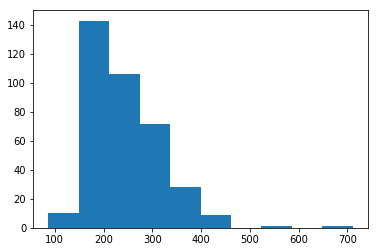

In [260]:
plt.hist(test_raw['count_words'])

In [261]:
test_raw['count_words'].describe()

count    370.000000
mean     246.008108
std       71.158455
min       87.000000
25%      194.000000
50%      228.500000
75%      287.000000
max      711.000000
Name: count_words, dtype: float64

(array([ 34., 114., 124.,  51.,  20.,  13.,   3.,   9.,   1.,   1.]),
 array([ 7. , 11.8, 16.6, 21.4, 26.2, 31. , 35.8, 40.6, 45.4, 50.2, 55. ]),
 <a list of 10 Patch objects>)

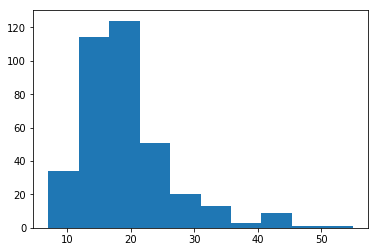

In [262]:
plt.hist(test_raw['count_sentences'])

In [263]:
test_raw['count_sentences'].describe()

count    370.000000
mean      19.086486
std        7.301340
min        7.000000
25%       14.000000
50%       18.000000
75%       22.000000
max       55.000000
Name: count_sentences, dtype: float64

(array([267.,  50.,  23.,   7.,   9.,   6.,   4.,   2.,   0.,   2.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <a list of 10 Patch objects>)

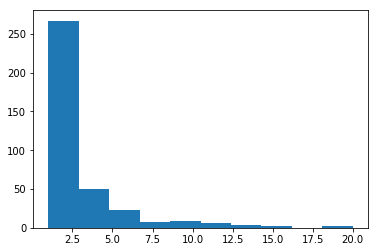

In [264]:
plt.hist(test_raw['count_passages'])

In [265]:
test_raw['count_passages'].describe()

count    370.000000
mean       2.467568
std        3.021204
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       20.000000
Name: count_passages, dtype: float64